# Classifying Patients Based on Interviews

## Dataset 1: Simulated Medical Exams

* [Data Paper](https://www.nature.com/articles/s41597-022-01423-1)
* [Dataset](https://springernature.figshare.com/articles/dataset/Collection_of_simulated_medical_exams/16550013?backTo=%2Fcollections%2FA_dataset_of_simulated_patient-physician_medical_interviews_with_a_focus_on_respiratory_cases%2F5545842&file=30598530)

Cases were divided into the following categories:

- Respiratory cases (designated “RES”)
- Musculoskeletal cases (designated “MSK”)
- Cardiac cases (designated “CAR”)
- Dermatological case (designated “DER”)
- Gastrointestinal cases (designated “GAS”)

## Dataset 2: Depression: Twitter Dataset + Feature Extraction

* [Dataset](https://www.kaggle.com/datasets/infamouscoder/mental-health-social-media)

## Model

Like BERT, RoBERTa is “bidirectional,” meaning it considers the context from both the left and the right sides of a token, rather than just the left side as in previous models. This allows RoBERTa to better capture the meaning and context of words in a sentence, leading to improved performance on a variety of NLP tasks. It has achieved state-of-the-art performance on several benchmarks, making it a powerful tool for NLP practitioners.


In [24]:
%pip install joblib nltk scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [25]:
import os
import joblib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
import random
# nltk.download('omw-1.4')
# nltk.download('punkt_tab')
nltk.download("stopwords")
# from nltk.corpus import stopwords
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import FunctionTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/robrohan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
df = pd.DataFrame(columns=['id', 'label', 'text', 'len'])
for dirname, _, filenames in os.walk('./datasets/Data/Clean Transcripts'):
    for i, filename in enumerate(filenames):
        with open(os.path.join(dirname, filename), encoding="iso8859-1") as f:
            try:
                text_array = f.read()
                label = 1 if filename[0:3] == "RES" else 0
                df.loc[i] = [int(filename[3:7]), label, text_array.strip(), len(text_array.strip())]
            except Exception as e:
                print(filename, e)
df.sample(10)

,id,label,text,len
167,102,1,D: What brings you in here today. \n\nP: I I'v...,10713
190,58,1,D: How are you?\n\nP: I'm doing OK. Thank you....,8079
41,193,1,"D: What brings you here today?\n\nP: Hi, I bri...",7762
271,198,1,"D: What brings you here today?\n\nP: Um hi, ye...",4685
161,88,1,"D: Uh, what brings you in here today?\n\nP: Ye...",7473
264,205,1,D: I'm going to be having a chat with you toda...,5471
129,130,1,"D: What brings you in? \n\nP: Yeah, I've had u...",7344
25,35,1,D: May I just begin with asking you what broug...,5505
55,8,0,D: How may I help you?\n\nP: Um so I was playi...,7949
44,150,1,"D: How may I help you? \n\nP: Hi, um my son ha...",6474


In [27]:
train = df

<Axes: xlabel='label', ylabel='count'>

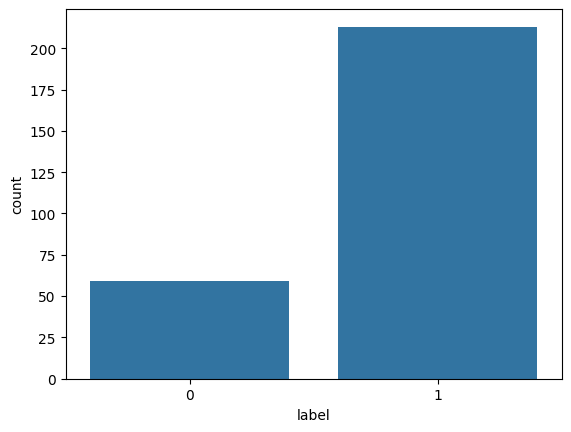

In [28]:
sns.countplot(data=train, x="label")

In [29]:
# lemma = nltk.WordNetLemmatizer()
# text_list=[]
# for text in data.post_text:
#     description = re.sub("[^a-zA-Z]"," ", text)
#     description = description.lower()
#     description = nltk.word_tokenize(text)
#     # description = [word for word in text if word not in set(stopwords.words("english"))] Done in vectorize below
#     description = [lemma.lemmatize(word) for word in text]                                # lemmatize the words
#     description = "".join(description)                                                    # put the words back into a single blob
#     text_list.append(description)

In [30]:
def to_sparse(x):
    return x.toarray()

# Gaussian Naive Bayes algorithm - probabilistic approach, assuming that the
# features follow a normal (Gaussian) distribution.
# GaussianNB(var_smoothing=0.03)
calibrated_nb = CalibratedClassifierCV(GaussianNB(), method='sigmoid', cv=5)

model = make_pipeline(
    # Convert a collection of text documents to a matrix of token counts.
    CountVectorizer(max_features=10240, stop_words="english"),
    # Transform the data into a sparse matrix for the next stem
    FunctionTransformer(to_sparse, accept_sparse=True),
    calibrated_nb,
)

In [31]:
x_train, x_test, y_train, y_test = train_test_split(train.text, train.label, test_size=0.3, random_state=int(9216*random.random()))
# print(type(x_train), type(y_train))
model.fit(x_train, y_train)

,steps,"[('countvectorizer', ...), ('functiontransformer', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


In [32]:
model.score(x_train, y_train)

1.0

In [33]:
confusion_matrix(y_test, model.predict(x_test))

array([[15,  6],
       [ 0, 61]])

## Save the Model

In [34]:
joblib.dump(model, 'gaussian_nb_model.joblib')

['gaussian_nb_model.joblib']

# Predict

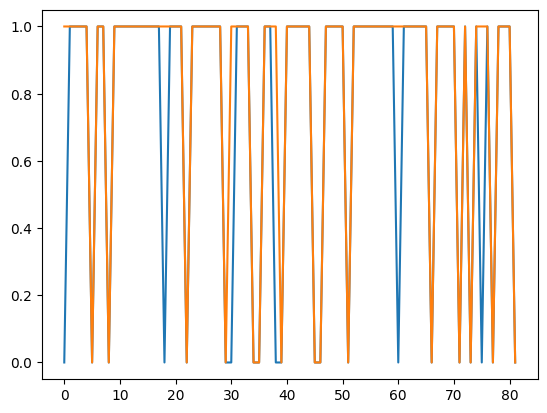

array([[0.2639522 , 0.7360478 ],
       [0.10738654, 0.89261346],
       [0.10738654, 0.89261346],
       [0.10738654, 0.89261346],
       [0.10738654, 0.89261346],
       [0.89555554, 0.10444446],
       [0.10738654, 0.89261346],
       [0.10738654, 0.89261346],
       [0.89555554, 0.10444446],
       [0.10738654, 0.89261346],
       [0.10738654, 0.89261346],
       [0.10738654, 0.89261346],
       [0.10738654, 0.89261346],
       [0.10738654, 0.89261346],
       [0.10738654, 0.89261346],
       [0.10738654, 0.89261346],
       [0.10738654, 0.89261346],
       [0.10738654, 0.89261346],
       [0.43316777, 0.56683223],
       [0.10738654, 0.89261346],
       [0.10738654, 0.89261346],
       [0.10738654, 0.89261346],
       [0.89555554, 0.10444446],
       [0.10738654, 0.89261346],
       [0.10738654, 0.89261346],
       [0.10738654, 0.89261346],
       [0.10738654, 0.89261346],
       [0.10738654, 0.89261346],
       [0.10738654, 0.89261346],
       [0.89555554, 0.10444446],
       [0.

In [35]:
loaded_model = joblib.load('gaussian_nb_model.joblib')
predictions = loaded_model.predict(x_test)
proba = loaded_model.predict_proba(x_test)
plt.plot(np.asarray(y_test))
plt.plot(np.array(predictions))
plt.show()
display(proba)